<a href="https://colab.research.google.com/github/NatalyaPetykhova/Practicum_projects/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82__%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D1%82%D0%B0%D1%80%D1%82%D0%B0%D0%BF%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: Исследование стартапов

Автор: Петухова Наталья

Дата: 08.01.2025г.

## Введение

### Цели и задачи проекта

**Цель:** ППодготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязи данных.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Для анализа поступили данные об инвестиционном рынке стартапов. Данные состоят из пяти датасетов:

- `/datasets/company_and_rounds.csv` — содержит информацию о компаниях и раундах финансирования;
- `/datasets/acquisition.csv` —  содержит информацию о покупках одними компаниями других компаний;
- `/datasets/people.csv` —  содержит информацию о сотрудниках;
- `/datasets/education.csv` —  содержит информацию об образовании сотрудника;
- `/datasets/degrees.csv` —  содержит информацию о типе образования сотрудника.

### Описание датасета `company_and_rounds.csv`

- `company ID` — идентификатор компании;
- `name` — название компании;
- `category code` — категория области деятельности компании;
- `status` — статус компании;
- `founded at` — дата инвестирования;
- `closed at` — дата закрытия компании;
- `domain` — официальный сайт компании;
- `network username` — ник компании в сети;
- `country code` — код страны компании;
- `investment rounds` — число инвестиционных раундов;
- `funding rounds` — число раундов финансирования;
- `funding total` — сумма финансирования;
- `milestones` — вехи финансирования;
- `funding round id` — идентификатор этапа финансирования;
- `company id` — идентификатор компании;
- `funded at` — дата финансирования;
- `funding round type` — тип финансирования;
- `raised amount` — сумма финансирования;
- `pre money valuation` — предварительная денежная оценка;
- `participants` — число участников;
- `is first round` — является ли раунд первым;
- `is last round` — является раунд последним.

### Описание датасета `acquisition.csv`

- `id` — идентификатор покупки;
- `acquiring_company_id` — идентификатор покупающей компании;
- `acquired_company_id` — идентификатор покупаемой компании;
- `term_code` — варианты расчёта;
- `price_amount` — сумма сделки;
- `acquired_at` — дата сделки.

### Описание датасета `people.csv`

- `id` — идентификатор сотрудника;
- `first_name` — имя сотрудника;
- `last_name` — фамилия сотрудника;
- `company_id` — идентификатор компании;
- `network_username` — ник в социальных сетях.

### Описание датасета `education.csv`

- `id` — идентификатор записи об образовании;
- `person_id` — идентификатор работника;
- `instituition` — название учебного заведения;
- `graduated_at` — дата получения образования.


### Описание датасета `degrees.csv`

- `id` — идентификатор записи;
- `object_id` — идентификатор сотрудника;
- `degree_type` — тип образования;
- `subject` — специальность.



### Содержимое проекта

1. Введение
2. Знакомство с данными: загрузка и первичная предобработка
3. Предобработка данных, предварительное исследование
4. Исследовательский анализ объединённых таблиц
5. Итоговый вывод и рекомендации


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов


* Загрузите все данные по проекту.


* Проверьте названия столбцов.


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

Начнём с загрузки библиотек и датасетов:
- acquisition.csv
- company_and_rounds.csv
- degrees.csv
- education.csv
- people.csv

Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в переменных:
- acquisition_df
- company_and_rounds_df
- degrees_df
- education_df
- people_df

In [ ]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
#from phik import phik_matrix
!pip install phik

In [ ]:
# Выгружаем данные в переменные
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')


Познакомимся с данными датасетов — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [ ]:
# Выводим первые строки датафрейма на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [ ]:
# Выводим информацию о датафрейме
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет `acquisition.csv` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.

Названия столбцов написаны в едином стиле, значения в столбцах соответствуют своему описанию.

Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `int64` и `object`.

Столбец `acquired_at` содержит информацию о дате сделки, его нужно привести к типу данных `datetime64`, для более удобной обработки временных данных.

Пропуски содержатся только в столбцах `term_code` и `acquired_at`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.

In [ ]:
# Выводим первые строки датафрейма на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Выводим информацию о датафрейме
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `company_and_rounds.csv` содержит 22 столбца и 217774 строки, в которых представлена информация о компаниях и раундах финансирования.

Названия столбцов нужно привести к стилю `snake case` , значения в столбцах соответствуют своему описанию.


Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `float64` и `object`.

Столбцы `founded at`(дата инвестирования), `closed at`(дата закрытия компании) и `funded at`(дата финансирования), нужно привести к типу данных `datetime64`, для более удобной обработки временных данных. Столбцы `company  ID`, `company  id`, `funding  round  id` и `participants` нужно привести к типу `int64`. А столбцы  `is  first  round` и `is  last  round` привести к типу `int8`

Пропуски содержатся во всех столбцах таблицы.

Сразу приведем названия столбцов к единому стилю.

In [ ]:
# Передаём методу rename() словарь с названиями столбцов
company_and_rounds_df = company_and_rounds_df.rename(columns={'company  ID' : 'company_i_d',
                                                              'name' : 'name' ,
                                                              'category  code' : 'category_code' ,
                                                              'status' : 'status',
                                                              'founded  at' : 'founded_at',
                                                              'closed  at' : 'closed_at',
                                                              'domain' : 'domain',
                                                              'network  username' : 'network_username',
                                                              'country  code' : 'country_code',
                                                              'investment  rounds' : 'investment_rounds',
                                                              'funding  rounds' : 'funding_rounds',
                                                              'funding  total' : 'funding_total',
                                                              'milestones' : 'milestones',
                                                              'funding  round  id' : 'funding_round_id',
                                                              'company  id' : 'company_id',
                                                              'funded  at' : 'funded_at',
                                                              'funding  round  type' : 'funding_round_type',
                                                              'raised  amount' : 'raised_amount',
                                                              'pre  money  valuation' : 'pre_money_valuation',
                                                              'participants' : 'participants',
                                                              'is  first  round' : 'is_first_round',
                                                              'is  last  round' : 'is_last_round'})

In [ ]:
"""
# Так же можно написать функцию для корректировки названия столбцов в snake_case
def to_snake_case(column_name):

    # Заменяем пробелы на подчеркивания и приводим к нижнему регистру
    return column_name.replace('  ', '_').lower()

def rename_columns_to_snake_case(df):

    # Применяет функцию to_snake_case ко всем названиям столбцов
    df.columns = [to_snake_case(col) for col in df.columns]
    return df
"""

"\n# Так же можно написать функцию для корректировки названия столбцов в snake_case\ndef to_snake_case(column_name):\n    \n    # Заменяем пробелы на подчеркивания и приводим к нижнему регистру\n    return column_name.replace('  ', '_').lower()\n\ndef rename_columns_to_snake_case(df):\n    \n    # Применяет функцию to_snake_case ко всем названиям столбцов \n    df.columns = [to_snake_case(col) for col in df.columns]\n    return df\n"

In [ ]:
"""
# Применяем функцию
company_and_rounds_df = rename_columns_to_snake_case(company_and_rounds_df)
"""

'\n# Применяем функцию\ncompany_and_rounds_df = rename_columns_to_snake_case(company_and_rounds_df)\n'

In [ ]:
# Проверяем результат. Выводим названия столбцов датафрейма company_and_rounds_df
company_and_rounds_df.columns

Index(['company_i_d', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [ ]:
# Выводим первые строки датафрейма на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [ ]:
# Выводим информацию о датафрейме
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет `degrees.csv` содержит 4 столбцов и 109610 строк, в которых представлена информация о типе образования сотрудника.

Названия столбцов написаны в едином стиле, значения в столбцах соответствуют своему описанию.

Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `int64` и `object`. Типы данных столбца `object_id`(идентификатор сотрудника) нужно привести к типу int64.

Пропуски содержатся только в столбцах degree_type и subject.

In [ ]:
# Выводим первые строки датафрейма на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [ ]:
# Выводим информацию о датафрейме
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет `education.csv` содержит 64 столбцов и 109610 строк, в которых представлена информация об образовании сотрудника.

Названия столбцов написаны в едином стиле, значения в столбцах соответствуют своему описанию.

Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `int64` и `object`.

Столбец `graduated_at` содержит информацию о дате получения образования, его нужно привести к типу данных `datetime64`, для более удобной обработки временных данных.

Пропуски содержатся только в столбцах `instituition` и `raduated_at`.

In [ ]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [ ]:
# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет `people.csv` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках.

Названия столбцов написаны в едином стиле, значения в столбцах соответствуют своему описанию.

Представленные данные содержат числовые и текстовые значения и хранятся в типах данных `float64`, `int64` и `object`.

Пропуски содержатся только в столбцах `company_id` и `network_username`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Преобразуем типы данных в столцах acquired_at(дата сделки), founded_at(дата инвестирования), closed_at(дата закрытия компании), funded_at(дата финансирования),  graduated_at(дата получения образования).

In [ ]:
# Преобразуем тип данных в datetime, игнорируя пропуски
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'], errors='coerce')
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'], errors='coerce')
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], errors='coerce')
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')

# Преобразуем тип данных столбцов к типу Int64
company_and_rounds_df['company_i_d'] = company_and_rounds_df['company_i_d'].astype('Int64')
company_and_rounds_df['company_id'] = company_and_rounds_df['company_id'].astype('Int64')
company_and_rounds_df['funding_round_id'] = company_and_rounds_df['funding_round_id'].astype('Int64')
company_and_rounds_df['participants'] = company_and_rounds_df['participants'].astype('Int64')
company_and_rounds_df['is_first_round'] = company_and_rounds_df['is_first_round'].astype('Int8')
company_and_rounds_df['is_last_round'] = company_and_rounds_df['is_last_round'].astype('Int8')

In [ ]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_i_d          217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [ ]:
# Удаляем символ `р:`, для того чтобы преобразовать тип данных столбца 'object_id'
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '', regex=True)
degrees_df

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,268589,CPA,NaN
109606,109607,268527,MS & BS,Engineering
109607,109608,268527,PhD,Engineering
109608,109609,268528,B.S.,Electrical Engineering


In [ ]:
# Преобразуем тип данных столбца 'object_id' к типу int64 с обработкой ошибок
degrees_df['object_id'] = pd.to_numeric(degrees_df['object_id'], errors='coerce')

In [ ]:
# Проверим типы данных в датафрейме degrees_df с помощью атрибута dtypes
degrees_df.dtypes

id              int64
object_id       int64
degree_type    object
subject        object
dtype: object

In [ ]:
# Проверим типы данных в датафрейме acquisition_df с помощью атрибута dtypes
acquisition_df.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [ ]:
# Проверим типы данных в датафрейме company_and_rounds_df с помощью атрибута dtypes
company_and_rounds_df.dtypes

company_i_d                     Int64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id                Int64
company_id                      Int64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                    Int64
is_first_round                   Int8
is_last_round                    Int8
dtype: object

In [ ]:
# Проверим типы данных в датафрейме education_df с помощью атрибута dtypes
education_df.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

In [ ]:
# Проверим типы данных в датафрейме degrees_df с помощью атрибута dtypes
degrees_df.dtypes

id              int64
object_id       int64
degree_type    object
subject        object
dtype: object

Изучим пропущенные значения в данных.

При первичном анализе мы обнаружили пропуски в некоторых столбцах. Узнаем абсолютное и относительное количество пропусков в данных.

In [ ]:
# Посчитаем количество строк с пропусками в каждом столбце
acquisition_df.isna().sum().sort_values(ascending = False)

term_code               7576
acquired_at               29
id                         0
acquiring_company_id       0
acquired_company_id        0
price_amount               0
dtype: int64

In [ ]:
# Посчитаем процент строк с пропусками
acquisition_df.isna().mean().sort_values(ascending = False)* 100

term_code               80.535771
acquired_at              0.308281
id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
price_amount             0.000000
dtype: float64

In [ ]:
# Посчитаем количество строк с пропусками в каждом столбце
company_and_rounds_df.isna().sum().sort_values(ascending = False)

closed_at              214325
funded_at              165094
is_last_round          164846
is_first_round         164846
participants           164846
pre_money_valuation    164846
raised_amount          164846
funding_round_type     164846
funding_round_id       164846
company_id             164846
network_username       122240
country_code           109167
founded_at             107818
category_code           73888
domain                  70615
company_i_d               302
milestones                302
name                      302
funding_rounds            302
investment_rounds         302
status                    302
funding_total             302
dtype: int64

In [ ]:
# Посчитаем процент строк с пропусками
company_and_rounds_df.isna().mean().sort_values(ascending = False)* 100

closed_at              98.416248
funded_at              75.809784
is_last_round          75.695905
is_first_round         75.695905
participants           75.695905
pre_money_valuation    75.695905
raised_amount          75.695905
funding_round_type     75.695905
funding_round_id       75.695905
company_id             75.695905
network_username       56.131586
country_code           50.128574
founded_at             49.509124
category_code          33.928752
domain                 32.425818
company_i_d             0.138676
milestones              0.138676
name                    0.138676
funding_rounds          0.138676
investment_rounds       0.138676
status                  0.138676
funding_total           0.138676
dtype: float64

In [ ]:
# Посчитаем количество строк с пропусками в каждом столбце
degrees_df.isna().sum().sort_values(ascending = False)

subject        28312
degree_type    11218
id                 0
object_id          0
dtype: int64

In [ ]:
# Посчитаем процент строк с пропусками
degrees_df.isna().mean().sort_values(ascending = False)* 100

subject        25.829760
degree_type    10.234468
id              0.000000
object_id       0.000000
dtype: float64

In [ ]:
# Посчитаем количество строк с пропусками в каждом столбце
education_df.isna().sum().sort_values(ascending = False)

graduated_at    51556
instituition       55
id                  0
person_id           0
dtype: int64

In [ ]:
# Посчитаем процент строк с пропусками
education_df.isna().mean().sort_values(ascending = False)* 100

graduated_at    47.035854
instituition     0.050178
id               0.000000
person_id        0.000000
dtype: float64

In [ ]:
# Посчитаем количество строк с пропусками в каждом столбце
people_df.isna().sum().sort_values(ascending = False)

company_id          192094
network_username    187842
first_name               5
last_name                1
id                       0
dtype: int64

In [ ]:
# Посчитаем процент строк с пропусками
people_df.isna().mean().sort_values(ascending = False)* 100

company_id          84.731528
network_username    82.855996
first_name           0.002205
last_name            0.000441
id                   0.000000
dtype: float64

**Анализ пропусков**

1. Датасет `acquisition.csv` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.

Пропуски содержатся в столбцах:
- `term_code`(варианты расчёта) - 80.5%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неопределённые условия сделки: В некоторых случаях условия сделки могут быть не зафиксированы или не применимы, что приводит к отсутствию значения в этом столбце.
    2. Разные форматы данных: Если данные о сделках поступают из различных источников, могут возникнуть несоответствия в форматах, что может привести к пропускам.
    3. Ошибки ввода данных: Человеческий фактор также может сыграть роль, если данные вводятся вручную, что может привести к пропускам.
- `acquired_at`(дата сделки) - 0.3%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Отсутствие даты сделки: В некоторых случаях дата сделки может быть неизвестна или не зафиксирована, особенно если сделка была закрыта быстро или в условиях конфиденциальности.
    2. Ошибки в обработке данных: При импорте данных могут возникнуть ошибки, которые приводят к потере информации о дате.
    3. Разные временные зоны: Если данные о сделках поступают из разных временных зон, это может привести к путанице и отсутствию значений.
    
2. Датасет `company_and_rounds.csv` содержит 22 столбца и 217774 строки, в которых представлена информация о компаниях и раундах финансирования.

Пропуски содержатся в столбцах:
- `category_code`(категория области деятельности компании) - 33.9%. Пропуски в данном столбце могут быть по нескольким причинам:  
    1. Неопределённость в классификации: Некоторые компании могут не подходить под существующие категории или их деятельность может быть слишком широкой для точной классификации.
    2. Отсутствие информации: В некоторых случаях информация о категории может быть недоступна или не была собрана.
- `founded_at`(дата инвестирования) - 49.5%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неизвестная дата: Дата основания компании может быть неизвестна, особенно для стартапов или новых компаний, которые не публикуют эту информацию.
    2. Ошибки ввода данных: При сборе данных могли произойти ошибки, и информация о дате могла быть пропущена.
- `closed_at`(дата закрытия компании) - 98.4%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неизвестная дата закрытия: Некоторые компании могут быть активными, поэтому информации о закрытии нет.
    2. Конфиденциальность: В некоторых случаях информация о закрытии компании может быть конфиденциальной и не публиковаться.
- `domain`(официальный сайт компании) - 32.4%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Отсутствие веб-сайта: Некоторые компании, особенно стартапы или малые предприятия, могут не иметь официального веб-сайта.
    2. Ошибки в сборе данных: При сборе данных информация о домене могла быть пропущена или неправильно записана.
- `network_username`(ник компании в сети) - 56.1%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неактивные аккаунты: Некоторые компании могут не иметь аккаунтов в социальных сетях или других сетевых платформах.
    2. Отсутствие информации: Информация о никнейме может быть недоступна или не собрана.
- `country_code`(код страны компании) - 50.1%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неизвестная страна: В некоторых случаях информация о стране может быть недоступна, особенно для международных компаний.
    2. Ошибки ввода данных: При сборе данных могли произойти ошибки, и информация о стране могла быть пропущена.
- `funding_round_id`(идентификатор этапа финансирования) - 75.6%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неопределённые этапы финансирования: Некоторые компании могут не иметь четко определённых этапов финансирования, что может привести к отсутствию идентификаторов.
    2. Ошибки в сборе данных: При сборе данных информация о идентификаторе могла быть пропущена.
- `company_id`(идентификатор компании) - 75.6%. Скорее всго пропуски в данном столбце могут быть по причине того, что столбец дублируется. В данных имеется еще один столбец `company_id` в котором пропущенных значений всего 0.1%.
- `funded_at`(дата финансирования) - 75.8%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неизвестная дата финансирования: В некоторых случаях информация о дате финансирования может быть недоступна.
    2. Ошибки в сборе данных: При сборе данных информация о дате могла быть пропущена.
- `funding_round_type`(тип финансирования) - 75.6%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неопределённые типы финансирования: Некоторые компании могут не иметь четко определённых типов финансирования, что может привести к отсутствию значений.
    2. Ошибки ввода данных: При сборе данных информация о типе финансирования могла быть пропущена.
- `raised_amount`(сумма финансирования) - 75.6%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неизвестная сумма: В некоторых случаях информация о сумме финансирования может быть недоступна или не была собрана.
    2. Ошибки в сборе данных: При сборе данных информация о сумме могла быть пропущена.
- `pre_money_valuation`(предварительная денежная оценка) - 75.6%. Предварительная денежная оценка — это оценочная стоимость компании до того, как она получит новый капитал от инвесторов. Она даёт представление о том, какой может быть текущая стоимость компании. Предварительная денежная оценка не обязательно является статичной цифрой, она меняется со временем по мере поиска нового финансирования. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неизвестная оценка: Некоторые компании могли не получить предварительную денежную оценку или она менялась и в итоге данные не сохранились. В некоторых случаях информация о предварительной оценке может быть недоступна или утеряна.
    2. Конфиденциальность: Некоторые компании могут не раскрывать свою предварительную оценку.
- `participants`(число участников) - 75.6%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неизвестное количество участников: В некоторых случаях информация о количестве участников не была зафиксирована.
    2. Ошибки в сборе данных: При сборе данных информация о количестве участников могла быть пропущена.
- `is_first_round`(является ли раунд первым) - 75.6% и `is_last_round`(является раунд последним) - 75.6%. Пропуски в столбцах у раундах финансирования могут быть по нескольким причинам:
    1. Недостаток информации: Некоторые стартапы могут не иметь полной информации о своих раундах финансирования, особенно на ранних стадиях, когда данные еще не были собраны или подтверждены.
    2. Конфиденциальность данных: Информация о финансах и участниках раунда может считаться конфиденциальной, и компании могут не раскрывать ее в полном объеме.
    3. Ошибки при сборе данных: Пропуски могут возникать из-за ошибок в процессе сбора данных, таких как неправильное заполнение или технические сбои.
    4. Разные стандарты отчетности: Компании могут использовать различные стандарты и практики для отчетности о своих раундах финансирования, что может привести к неполным данным.
    5. Изменения в структуре компании: Если компания меняет свою структуру или стратегию, это может повлиять на доступность информации о раундах финансирования.
- В столбцах `company_i_d`(идентификатор компании), `milestones`(вехи финансирования), `name`(название компании), `funding_rounds`(число раундов финансирования), `investment_rounds`(число инвестиционных раундов), `status`(статус компании), `funding_total`(сумма финансирования), одинаковое количество пропущенных строк - 302, что составлят 0,1% от общего объема данных. Значения могут отсутствовать в результате ошибки или сбоя при выгрузке данных.        

3. Датасет `degrees.csv` содержит 4 столбцов и 109610 строк, в которых представлена информация о типе образования сотрудника.

Пропуски содержатся только в столбцах:
- `degree_type`(тип образования) - 10.2%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неопределённость в классификации: В некоторых случаях тип образования может быть неясен или не зафиксирован, особенно если сотрудник имеет несколько степеней или если степень не соответствует стандартным категориям. Если данные о сотрудниках поступают из различных источников, могут возникнуть несоответствия в форматах, что может привести к пропускам.
    2. Отсутствие информации: Некоторые сотрудники могут не предоставлять информацию о своем образовании, особенно если это не является обязательным требованием для их должности.
    3. Ошибки ввода данных: При сборе данных могли произойти ошибки, и информация о типе образования могла быть пропущена.
- `subject`(специальность) - 25.8%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неизвестная специальность: В некоторых случаях информация о специальности может быть неизвестна, особенно если сотрудник получил образование в области, которая не имеет четкой классификации.
    2. Отсутствие информации: Сотрудники могут не указывать свою специальность, особенно если это не является обязательным требованием для их должности.
    3. Ошибки ввода данных: При сборе данных информация о специальности могла быть пропущена или неправильно записана.
    4. Разные образовательные системы: В зависимости от страны или образовательной системы, специальности могут называться по-разному, и это может привести к путанице и отсутствию значений.

4. Датасет `education.csv` содержит 64 столбцов и 109610 строк, в которых представлена информация об образовании сотрудника.

Пропуски содержатся только в столбцах:
- `instituition`(название учебного заведения) - 0.05%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Отсутствие информации: Некоторые сотрудники могут не указывать название учебного заведения, особенно если это не является обязательным требованием для их должности или если они получили образование за границей.
    2. Ошибки ввода данных: При сборе данных могли произойти ошибки, и информация о названии учебного заведения могла быть пропущена или неправильно записана.
    3. Неофициальные учебные заведения: Сотрудники могли получить образование в неофициальных или менее известных учебных заведениях, которые не были задокументированы в системе.
- `graduated_at`(дата получения образования) - 47%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неизвестная дата: В некоторых случаях информация о дате получения образования может быть неизвестна, особенно если сотрудник не помнит точную дату или не считает это важным.
    2. Отсутствие информации: Сотрудники могут не указывать дату окончания учебного заведения, если это не является обязательным требованием для их должности.
    3. Ошибки ввода данных: При сборе данных информация о дате получения образования могла быть пропущена или неправильно записана.

5. Датасет `people.csv` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках.

Пропуски содержатся только в столбцах:
- `company_id`(идентификатор компании) - 84,7%, Пропуски в данном столбце могут быть по нескольким причинам:
    1. Отсутствие привязки к компании: Некоторые сотрудники могут быть фрилансерами, временными работниками или подрядчиками, которые не привязаны к конкретной компании. В таких случаях информация о company_id может отсутствовать.
    2. Ошибки при сборе данных: Пропуски могут возникать из-за ошибок в процессе сбора данных, таких как неправильное заполнение форм, технические сбои или проблемы с интеграцией данных из различных источников. При ручном вводе данных могут возникать ошибки.
    3. Конфиденциальность данных: В некоторых случаях информация о компании может быть конфиденциальной, и сотрудники могут не предоставлять эту информацию.
- `network_username`(ник в социальных сетях) - 82,8%. Пропуски в данном столбце могут быть по нескольким причинам:
    1. Неактивные аккаунты: Некоторые сотрудники могут не иметь аккаунтов в социальных сетях или других сетевых платформах.
    2. Отсутствие информации: Информация о никнейме может быть недоступна или не собрана.
    3. Ошибки ввода данных: При сборе данных информация могла быть пропущена ли утеряна.


## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [ ]:
# Извлекаем год из столбца funded_at
company_and_rounds_df['year'] = company_and_rounds_df['funded_at'].dt.year

# Создаем сводную таблицу
pivot_table = company_and_rounds_df.groupby('year').agg(
    typical_raised_amount=('raised_amount', 'median'),  # Типичный размер средств (медиана)
    total_rounds=('raised_amount', 'count')              # Общее количество раундов
).reset_index()

# Оставляем только те годы, где больше 50 раундов
pivot_table = pivot_table[pivot_table['total_rounds'] > 50]
display(pivot_table)

,year,typical_raised_amount,total_rounds
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159
20,2004.0,5000000.0,291
21,2005.0,5500000.0,1633
22,2006.0,5000000.0,2436
23,2007.0,3973320.0,3279
24,2008.0,3110000.0,3774


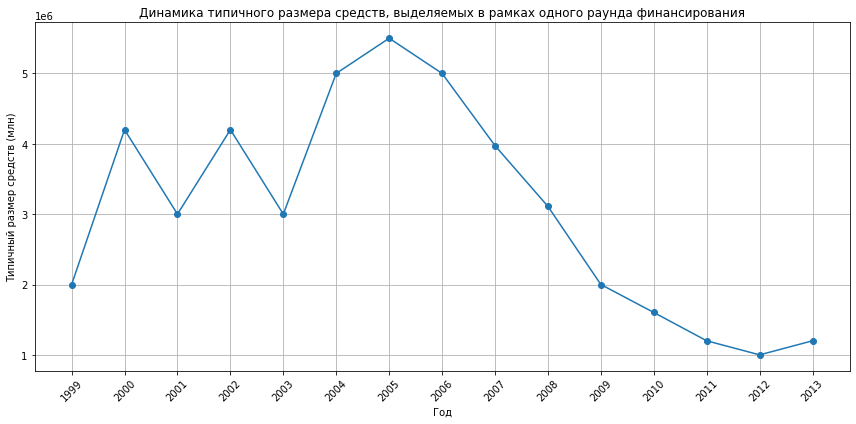

In [ ]:
# Строим график
plt.figure(figsize=(12, 6))
plt.plot(pivot_table['year'], pivot_table['typical_raised_amount'], marker='o')
plt.title('Динамика типичного размера средств, выделяемых в рамках одного раунда финансирования')
plt.xlabel('Год')
plt.ylabel('Типичный размер средств (млн)')
plt.grid()
plt.xticks(pivot_table['year'], rotation=45)
plt.tight_layout()
plt.show()

В 2005 году типичный размер собранных средств в рамках одного раунда финансирования был максимален.

Количество раундов в 2013 году увеличилось по сравнению с предыдущими годами, это может указывать на рост интереса инвесторов к стартапам. Но типичный размер средств, выделяемых в рамках одного раунда, значительно уменьшился, что может свидетельствовать о том, что инвесторы не готовы вкладывать большое количество средств в стартапы.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [ ]:
# Объединение таблиц по идентификатору сотрудника
merged_df = pd.merge(people_df, education_df, left_on='id', right_on='person_id', how='left')

In [ ]:
# Проверим объединение и выведем информацию о новом датафрейме
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


In [ ]:
# Переименуем столбцы
merged_df.rename(columns={'id_x': 'id', 'id_y': 'id_education'}, inplace=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


In [ ]:
# Группируем данные и подсчитываем количество сотрудников
company_id_group_df = merged_df.groupby('company_id')['id'].count().reset_index()
# Выведем данные по убыванию количества сотрудников, чтобы оценить распределение
company_id_group_df.sort_values(by='id', ascending=False)

,company_id,id
48,59.0,376
25,29.0,221
777,1242.0,192
20605,231067.0,111
1761,4175.0,89
...,...,...
11164,68693.0,1
11165,68695.0,1
11167,68710.0,1
11168,68723.0,1


In [ ]:
def categorize_company_size(company_id_group_df):
    if company_id_group_df['id'] < 10:
        return 'Маленькая компания'
    elif 10 <= company_id_group_df['id'] <= 50:
        return 'Средняя компания'
    elif 51 <= company_id_group_df['id'] <= 200:
        return 'Большая компания'
    else:
        return 'Очень большая компания'

# Применение функции для создания новой колонки
merged_df['company_size'] = company_id_group_df.apply(categorize_company_size, axis=1)
merged_df

,id,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,company_size
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,Маленькая компания
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,Маленькая компания
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,Маленькая компания
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,Средняя компания
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,Большая компания
...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,NaN
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,NaN
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,NaN
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,NaN


In [ ]:
# Расчет доли сотрудников без информации об образовании
merged_df['pers_employee_education'] = merged_df['id_education'].isnull().astype(int)

# Группировка по размеру компании и расчет средней доли
result = merged_df.groupby('company_size')['pers_employee_education'].mean().reset_index()

result

,company_size,pers_employee_education
0,Большая компания,0.750000
1,Маленькая компания,0.673292
2,Очень большая компания,0.500000
3,Средняя компания,0.636704


Для того, чтобы визуально оценить долю сотрудников без информации об образовании относительно размеру компании, построим диаграмму.

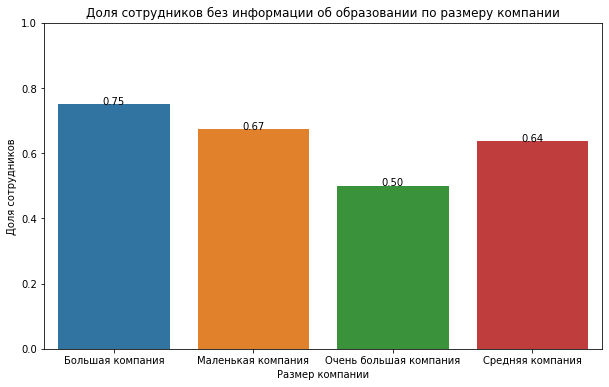

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='pers_employee_education', data=result)

# Настройка заголовка и меток
plt.title('Доля сотрудников без информации об образовании по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Доля сотрудников')
plt.ylim(0, 1)  # Установка пределов по оси Y от 0 до 1

# Показать значения на столбцах
for index, row in result.iterrows():
    plt.text(index, row['pers_employee_education'], f"{row['pers_employee_education']:.2f}", color='black', ha='center')

plt.show()

    Из данной диаграммы можно сделать вывод о том, что самый высокий процент сотрудников без информации об образовании, в компаниях численностью меньше 10 человек, а в компаниях с количеством сотрудников более 200, наоборот, процент таких сотрудников самый низкий.
    Считаю, что информация об образовании сотрудников достаточно полная.
    Границы, для того, чтобы разделить компании на группы по количеству человек, выбирала исходя из распределения данных.


Таблица degrees.csv может быть полезна для более глубокого анализа, она содержит информацию о типе образования сотрудника, поэтому присоединяем ее.

In [ ]:
# Присоединяем таблицу degrees.csv
merged_degrees_df = pd.merge(merged_df, degrees_df, left_on='id', right_on='object_id', how='left')

In [ ]:
# Проверим присоединение
merged_degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id_x                     370836 non-null  int64         
 1   first_name               370831 non-null  object        
 2   last_name                370835 non-null  object        
 3   company_id               70869 non-null   float64       
 4   network_username         81529 non-null   object        
 5   id_education             212198 non-null  float64       
 6   person_id                212198 non-null  float64       
 7   instituition             212109 non-null  object        
 8   graduated_at             113991 non-null  datetime64[ns]
 9   company_size             29584 non-null   object        
 10  pers_employee_education  370836 non-null  int64         
 11  id_y                     212198 non-null  float64       
 12  object_id       

In [ ]:
# Переименуем столбцы
merged_degrees_df.rename(columns={'id_x': 'id', 'id_y': 'id_degree_type'}, inplace=True)

In [ ]:
# Проверим переименование
merged_degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       370836 non-null  int64         
 1   first_name               370831 non-null  object        
 2   last_name                370835 non-null  object        
 3   company_id               70869 non-null   float64       
 4   network_username         81529 non-null   object        
 5   id_education             212198 non-null  float64       
 6   person_id                212198 non-null  float64       
 7   instituition             212109 non-null  object        
 8   graduated_at             113991 non-null  datetime64[ns]
 9   company_size             29584 non-null   object        
 10  pers_employee_education  370836 non-null  int64         
 11  id_degree_type           212198 non-null  float64       
 12  object_id       

In [ ]:
# Для наглядности выведем на экран объединенную таблицу
display(merged_degrees_df)

,id,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,company_size,pers_employee_education,id_degree_type,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,Маленькая компания,0,2415.0,10.0,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,Маленькая компания,1,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,Маленькая компания,1,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,Средняя компания,1,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,Большая компания,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370831,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,1,NaN,NaN,NaN,NaN
370832,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,NaN,0,25958.0,174088.0,M.B.B.S.,Medicine
370833,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,NaN,0,18871.0,118386.0,PhD,Journalism
370834,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,NaN,1,NaN,NaN,NaN,NaN


### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [ ]:
# Проверка наличия столбца network_username
has_username_df1 = 'network_username' in company_and_rounds_df.columns
has_username_df2 = 'network_username' in people_df.columns

print("network_username в company_and_rounds_df:", has_username_df1)
print("network_username в people_df:", has_username_df2)

network_username в company_and_rounds_df: True
network_username в people_df: True


In [ ]:
# Оценка уникальности значений в столбце network_username
unique_count_df1 = company_and_rounds_df['network_username'].nunique()
total_count_df1 = company_and_rounds_df['network_username'].count()
duplicate_count_df1 = total_count_df1 - unique_count_df1

unique_count_df2 = people_df['network_username'].nunique()
total_count_df2 = people_df['network_username'].count()
duplicate_count_df2 = total_count_df2 - unique_count_df2

print(f"Dataset 1: Уникальные значения: {unique_count_df1}, Всего: {total_count_df1}, Дубликаты: {duplicate_count_df1}")
print(f"Dataset 2: Уникальные значения: {unique_count_df2}, Всего: {total_count_df2}, Дубликаты: {duplicate_count_df2}")

Dataset 1: Уникальные значения: 79571, Всего: 95534, Дубликаты: 15963
Dataset 2: Уникальные значения: 38421, Всего: 38867, Дубликаты: 446


In [ ]:
# Наиболее часто встречающиеся значения в company_and_rounds_df
top_duplicates_df1 = company_and_rounds_df['network_username'].value_counts().head(10)

# Наиболее часто встречающиеся значения в dataset2
top_duplicates_df2 = people_df['network_username'].value_counts().head(10)

print("\nНаиболее часто встречающиеся значения в dataset1:")
print(top_duplicates_df1)

print("\nНаиболее часто встречающиеся значения в dataset2:")
print(top_duplicates_df2)


Наиболее часто встречающиеся значения в dataset1:
Goodman_UK      20
IndiaMART       17
tyropayments    15
mobivery        15
AviirLabs       14
TeleComSys      13
Perficient      13
solarcity       13
GalectinGALT    13
InstaMed        13
Name: network_username, dtype: int64

Наиболее часто встречающиеся значения в dataset2:
iWatchLife        6
chrislogan        5
firstscribe       4
ConnectAndSell    4
contentcircles    3
PepitaStore       3
edsdru            3
gmrtranscripts    3
gmrweb123         3
weareqipp         3
Name: network_username, dtype: int64


На основе полученных данных можно сделать выводы:

Уникальных значений в столбце `network_username` значительно меньше общего количества записей, что указывает на наличие дубликатов, это может повлиять на качество объединения.

Одно и то же значение `network_username` встречается слишком часто, это может привести к нежелательным результатам при объединении.

Сравнение между датасетами: Значения `network_username` в датасетах разные, значит данные не подходят для объединения.
А также(как мы выяснили ранее) в столбцах `network_username` огромное количество пропусков. В `company_and_rounds_df` - 56.13%, в `people_df` - 82.8%

Столбцы с именем `network_username` нельзя использовать для объединения данных.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Для начала еще раз посмотрим на данные датасета company_and_rounds_df.

In [ ]:
# Выводим строки датафрейма на экран
company_and_rounds_df.head(20)

,company_i_d,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888,1,2005-10-01,series-a,5250000.0,0.0,2,0,1,2005.0
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889,1,2007-01-01,series-b,9500000.0,0.0,3,0,0,2007.0
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312,1,2008-05-19,series-c+,25000000.0,0.0,4,1,0,2008.0
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN
5,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,...,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN
6,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,...,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN
7,10002,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,...,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN
8,10003,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,...,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN
9,100042,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,...,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN


In [ ]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_i_d          217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Судя во всему, это два разных датафрейма, некорректно соединенные в один. Потому, что есть 2 столбца с одинаковым названием - company_id. Есть 2 столбца с одинаковыми значениями funding total(сумма финансирования) и raised amount(сумма финансирования). Одна часть данных содержит данные о компаниях, а вторая, данные о раундах финансирования.

Предлагаю разделить датафрейм company_and_rounds_df на 2 датафрейма company_df и funding_rounds.

In [ ]:
# Выбираем нужные столбцы и создаем отдельный датафрейм company_df
company_columns = [
    'company_i_d',
    'name',
    'category_code',
    'status',
    'founded_at',
    'closed_at',
    'domain',
    'network_username',
    'country_code',
    'investment_rounds',
    'funding_rounds',
    'funding_total',
    'milestones'
]

company_df = company_and_rounds_df[company_columns].dropna(how='all').drop_duplicates().reset_index(drop=True)

In [ ]:
# Выбираем нужные столбцы и создаем отдельный датафрейм funding_rounds
company_columns = [
    'funding_round_id',
    'company_id',
    'funded_at',
    'funding_round_type',
    'raised_amount',
    'pre_money_valuation',
    'participants',
    'is_first_round',
    'is_last_round'
]

funding_rounds = company_and_rounds_df[company_columns].dropna(how='all').drop_duplicates().reset_index(drop=True)

In [ ]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_i_d        196553 non-null  Int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: Int64(1), datetime64[ns](2), float64(4), 

In [ ]:
# Проверяем разделение и выводим строки датафрейма на экран
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  Int64         
 1   company_id           52928 non-null  Int64         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  Int64         
 7   is_first_round       52928 non-null  Int8          
 8   is_last_round        52928 non-null  Int8          
dtypes: Int64(3), Int8(2), datetime64[ns](1), float64(2), object(1)
memory usage: 3.2+ MB


Теперь проверим и удалим дубликаты в созданных датафреймах.

In [ ]:
# Проверяем полные дубликаты в датафрейме
company_df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значения по company_i_d  должны быть уникальными, то есть каждая строка в данных — уникальная компания.

In [ ]:
# Проверяем неявные дубликаты в датафрейме в столбце company_i_d
company_df.duplicated(subset='company_i_d').sum()

0

Тут тоже всё хорошо — каждая строка соответствует уникальному значению.

In [ ]:
# Проверяем неявные дубликаты в датафрейме в столбце name
company_df.duplicated(subset='name').sum()

47

In [ ]:
# Проверяем неявные дубликаты в датафрейме в столбце name и category_code
company_df.duplicated(subset=['name', 'category_code']).sum()

46

In [ ]:
# Посмотрим на дубликаты которые нашли
duplicates = company_df[company_df.duplicated(subset=['name', 'category_code'], keep=False)]
display(duplicates)

,company_i_d,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
57558,200243,Canal do Crédito,consulting,operating,NaT,NaT,canaldocredito.com.br,canaldocredito,NaN,0.0,0.0,0.0,1.0
62255,205898,BBOescape,games_video,operating,2013-06-01,NaT,bboescape.com,NaN,CAN,0.0,0.0,0.0,1.0
62256,205899,BBOescape,games_video,operating,2013-03-30,NaT,bboescape.com,NaN,CAN,0.0,0.0,0.0,1.0
62259,205900,BBOescape,games_video,operating,2013-03-30,NaT,bboescape.com,NaN,CAN,0.0,0.0,0.0,1.0
65174,209131,Insight,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133908,278267,Insight,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0
137428,281816,FlightHike,travel,operating,2013-05-01,NaT,flighthike.com,FlightHike,USA,0.0,0.0,0.0,1.0
137429,281817,FlightHike,travel,operating,2013-05-01,NaT,flighthike.com,FlightHike,USA,0.0,0.0,0.0,1.0
138249,282608,ISG Resources,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,1.0


In [ ]:
# Удаляем дубликаты по столбцам name' и 'category_code'
company_df = company_df.drop_duplicates(subset=['name', 'category_code'])

In [ ]:
# Проверяем
company_df.duplicated(subset=['name', 'category_code']).sum()

0

Дубликаты удалены. Теперь посмотрим на пропуски в датафрейме `company_df`

In [ ]:
# Посчитаем процент строк с пропусками
company_df.isna().mean().sort_values(ascending = False)* 100

closed_at            98.666714
network_username     58.990265
country_code         55.225005
founded_at           53.578753
category_code        37.317246
domain               35.608910
company_i_d           0.000000
name                  0.000000
status                0.000000
investment_rounds     0.000000
funding_rounds        0.000000
funding_total         0.000000
milestones            0.000000
dtype: float64

Пропуски содержатся в столбцах:

- `closed_at`(дата закрытия компании) - 98.6%. Пропуски в данном столбце могут быть потому что некоторые компании могут быть активными, поэтому информации о закрытии нет. Удалять строки с пропусками нельзя, иначе мы потеряем много важных данных, ставить заглушки тоже не будем. Когда компания будет закрыта, информация появится.

- `network_username`(ник компании в сети) - 58.9%. Пропуски в данном столбце могут быть по нескольким причинам: Некоторые компании могут не иметь аккаунтов в социальных сетях или других сетевых платформах или информация о никнейме может быть недоступна или не собрана. Так же оставляем такие строки без обработки.

- `founded_at`(дата инвестирования) - 53.5%. Пропуски в данном столбце могут быть по нескольким причинам: Дата основания компании может быть неизвестна, особенно для стартапов или новых компаний, которые не публикуют эту информацию, а так же при сборе данных могли произойти ошибки, и информация о дате могла быть пропущена. Оставим эти строки, так как процент пропусков большой, удалить их нельзя, иначе можем потерять важные данные.

- `country_code`(код страны компании) - 55.2%.  В некоторых случаях информация о стране может быть недоступна, особенно для международных компаний ил  при сборе данных могли произойти ошибки, и информация о стране могла быть пропущена. В этом случае можем заполнить пропуски заглушкой "Нет данных"

- `category_code`(категория области деятельности компании) - 37.3%. Пропуски в данном столбце могут быть по нескольким причинам:  Некоторые компании могут не подходить под существующие категории или их деятельность может быть слишком широкой для точной классификации, а так же в некоторых случаях информация о категории может быть недоступна или не была собрана. Такие пропуски тоже заполним заглушкой "Нет данных"

- `domain`(официальный сайт компании) - 35.6%. Некоторые компании, особенно стартапы или малые предприятия, могут не иметь официального веб-сайта, или при сборе данных информация о домене могла быть пропущена или неправильно записана, поэтому появились пропущенные значения. Данную информацию не считаю особо важной, она ни как не повлияет на наши исследования, поэтому заполним пропуски заглушкой "Нет данных"


In [ ]:
# Заполняем пропуски значением-индикатор
company_df['country_code'] = company_df['country_code'].fillna('Нет данных')
company_df['category_code'] = company_df['category_code'].fillna('Нет данных')
company_df['domain'] = company_df['domain'].fillna('Нет данных')

In [ ]:
# Проверяем, заполнились ли пропуски
company_df.isna().mean().sort_values(ascending = False)* 100

closed_at            98.666714
network_username     58.990265
founded_at           53.578753
company_i_d           0.000000
name                  0.000000
category_code         0.000000
status                0.000000
domain                0.000000
country_code          0.000000
investment_rounds     0.000000
funding_rounds        0.000000
funding_total         0.000000
milestones            0.000000
dtype: float64

Теперь проверим данные второго датафрейма `funding_rounds`

In [ ]:
# Выведем первые строки таблицы на экран
funding_rounds.head(15)

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888,1,2005-10-01,series-a,5250000.0,0.0,2,0,1
1,889,1,2007-01-01,series-b,9500000.0,0.0,3,0,0
2,2312,1,2008-05-19,series-c+,25000000.0,0.0,4,1,0
3,1644,1001,2008-02-26,series-a,5000000.0,0.0,3,1,1
4,6682,10014,2008-09-01,angel,0.0,0.0,1,1,1
5,3619,10015,2008-10-10,series-a,2000000.0,0.0,2,0,1
6,18213,10015,2010-09-10,series-b,9000000.0,0.0,4,0,0
7,27747,10015,2012-01-24,series-c+,12000000.0,0.0,4,0,0
8,45409,10015,2013-08-13,series-c+,43000000.0,0.0,5,1,0
9,54006,10015,2012-01-01,venture,2069200.0,0.0,4,0,0


In [ ]:
# Проверяем полные дубликаты в датафрейме
funding_rounds.duplicated().sum()

0

In [ ]:
# Проверяем неявные дубликаты в датафрейме в столбце funding_round_id
funding_rounds.duplicated(subset='funding_round_id').sum()

0

In [ ]:
# Проверяем неявные дубликаты в датафрейме в столбце name и category_code
funding_rounds.duplicated(subset=['funding_round_id', 'company_id']).sum()

0

Дубликатов в датафрейме `funding_rounds` не найдено. Теперь посмотрим на пропуски.

In [ ]:
# Посчитаем процент строк с пропусками
funding_rounds.isna().mean().sort_values(ascending = False)* 100

funded_at              0.468561
funding_round_id       0.000000
company_id             0.000000
funding_round_type     0.000000
raised_amount          0.000000
pre_money_valuation    0.000000
participants           0.000000
is_first_round         0.000000
is_last_round          0.000000
dtype: float64

Теперь, после разделения на 2 датафрейма, пропуски в `funding_rounds` всего в одном столбце `funded_at`(дата финансирования) - 75.8%. Пропуски в данном столбце могут быть по нескольким причинам:  В некоторых случаях информация о дате финансирования может быть недоступна или при сборе данных информация о дате могла быть пропущена. Процент пропусков достаточно большой, поэтому оставим их как есть, удалять не будем, чтобы не потерять более важную информацию.

Теперь, после разделения датафрейма company_and_rounds на 2 - company_df и funding_rounds данные приведены в вид, который позволяет проводить анализ в разрезе отдельных компаний.
    Датафрейм company_df содержит данные о компаниях а funding_rounds о раундах финансирования. После разделения уменьшилось количество пропущенных значений в данных о раундах финансирования и данные обоих датасетов стали более удобными для анализа.

